# Assignment 1 for Clustering: Target Trial Emulation

This notebook presents insights and analysis on the integration of clustering concepts into Target Trial Emulation using Python. The results for both estimands— __Intention-to-Treat (ITT) and Per Protocol (PP)__ —are examined.

---

## What is Target Trial Emulation?

Target Trial Emulation (TTE) is a method used in observational studies to estimate causal effects by mimicking a randomized controlled trial (RCT). Since actual RCTs may not always be feasible due to ethical, logistical, or financial constraints, TTE allows researchers to analyze observational data in a way that approximates the conditions of a well-designed trial.

### How does it work?
1. #### Define the estimand
   - Specify the causal question being addressed either __intention-to-treat (ITT) or per-protocol (PP)__.
2. #### Prepare Observational Data
   - Structure the data similarly to an RCT by including necessary variables like        treatment assignment, outcomes, eligibility, and censoring information.
3. #### Handle Censoring and Treatment Switching
   - Observational data may have informative censoring (e.g., patients drop out due      to health changes) or treatment switching (e.g., patients switching to another      treatment).
   - Inverse Probability of Censoring Weights (IPCW) are used to adjust for biases       introduced by these issues.
4. #### Expand the Observational Dataset into Trial Sequences
   - The data is transformed into a sequence of trials where individuals enter at        different times, ensuring comparisons between treatment groups remain valid.
5. #### Fit a Marginal Structural Model (MSM)
   - An MSM is used to estimate causal effects while accounting for time-dependent       confounding.
6. #### Generate Predictions & Visualizations
   - Compute survival probabilities and cumulative incidences under different            treatment scenarios.
   - Use plots to compare treatment effects over time.

---

## I. Intention-to-Treat (ITT)

Intention-to-treat (ITT) is a principle used in clinical trials and statistical analysis that ensures participants are analyzed in the groups to which they were originally assigned, regardless of whether they completed the treatment, adhered to the protocol, or switched interventions. 
### Survival Curves by Cluster for Treated Patients
- The graph represents estimated survival rates over time for different K-Means clusters of treated patients.
Each line corresponds to a cluster, showing how survival changes across the follow-up period.

Cluster-by-Cluster Analysis:
Cluster 0- starts with the highest survival (~0.3) but shows a steep decline over time.
This suggests that patients in this group initially have a good survival probability, but it drops quickly.

Cluster 1- begins at a lower survival probability (~0.12) and drops immediately to zero around the first follow-up time point.
This indicates a high-risk group where nearly all patients fail to survive early on.

Cluster 2 -starts around 0.15 and remains almost flat until the last time point, where it slightly increases.
This stability suggests moderate survival rates, potentially indicating a more resilient subgroup.

Cluster 3-begins slightly below 0.25 and gradually increases over time.
-is the most stable and even shows improvement, which could indicate effective treatment response or a different risk profile.


### Heatmap Diagram
- This heatmap represents the distribution of treatment and outcomes across K-Means clusters. The values inside the cells indicate the proportion of patients in each cluster that fall into a specific treatment-outcome category. The color intensity corresponds to the proportions, with darker shades indicating higher values.

"Treatment is most effective in Cluster 1 & Cluster 2"
These clusters have the highest proportion of patients who received treatment and had a positive outcome (50% and 45%, respectively).
They also have the lowest percentage of treated patients with negative outcomes.

"Cluster 3-has a high natural survival rate"
Even without treatment, 42% of patients had a positive outcome (highest among all clusters).
This suggests that patients in this group may have better baseline health, reducing the apparent benefit of treatment.

"Cluster 0 shows mixed treatment effects"
Similar proportions of positive outcomes between treated (30%) and untreated (33%) patients indicate unclear treatment benefits for this group.

"Cluster 3 has the highest untreated negative outcome rate (16%)"
This means that without treatment, some patients in this group are more likely to have poor outcomes compared to other clusters.


### Patient Clusters Based on Clinical and Treatment Features*

The graph shows patient clusters based on clinical and treatment features using PCA. Different colors represent clusters, with centroids marked by white Xs.

Cluster 1 (Green) has the best outcomes (82%) and highest treatment adherence (57%).
Cluster 2 (Purple) has the longest time on treatment but slightly lower outcomes (80%).
Cluster 3 (Blue) has moderate success (73%).
Cluster 0 (Red) has balanced but lower overall stats.

 Note: Longer treatment doesn't guarantee better outcomes, and younger patients (Cluster 1) seem to respond best.


### TTE Analysis by Cluster
3rd Graph (Treatment Effect by Patient Cluster)

Cluster 1 shows the greatest treatment benefit (effect: 1.2562, p = 0.0146), meaning treatment significantly improves outcomes for these patients.
Cluster 0 and Cluster 2 show weaker treatment effects (0.4382 and 0.5773, respectively), with p-values > 0.05, suggesting no statistically significant benefit.

Confidence Intervals (CI):
Cluster 1’s CI [0.2480, 2.2644] suggests a reliable positive treatment effect.
Cluster 0’s and Cluster 2’s CIs include zero, indicating uncertainty in treatment benefit.

### Conclusion 
Cluster 1 patients respond best to treatment, likely due to their younger age, higher weight, and better adherence, while Clusters 0 and 2 show no strong evidence of treatment effectiveness and may need alternative approaches.

Key Insights from TTE + K-means Analysis:
- Cluster 1.0 shows the greatest treatment benefit (effect: 1.2562)
- Cluster 3.0 shows the least treatment benefit (effect: 0.1600)

4th Graph (Treatment Effects by Patient Cluster)
Cluster 1 has the greatest treatment benefit (effect: 1.2562), showing a strong positive response.
Cluster 3 has the least benefit (effect: 0.1600), indicating minimal improvement with treatment.
The forest plot confirms that Cluster 1's treatment effect is the most significant, while others have wide confidence intervals, suggesting uncertainty.

.:
Cluster 1 patients (younger, higher weight, better adherence) benefit most from treatment. Cluster 3 shows little improvement, indicating the need for alternative strategies.

---

## II. Per-Protocol (PP)

Per Protocol analysis includes only participants who strictly follow the assigned treatment. It measures the treatment’s effect under ideal conditions but may introduce bias by excluding non-adherent participants.

### Integrating K-means Clustering: Key Benefits
Adding K-means clustering to this framework would substantially enhance your analysis in several ways:
1. Heterogeneous Treatment Effects Discovery
K-means could identify subgroups of patients who respond differently to treatment. This addresses the crucial question: "For whom does the treatment work best?" By clustering patients based on baseline characteristics (age, x1, x2, x3), you could estimate treatment effects within each cluster, potentially discovering important treatment effect heterogeneity that would otherwise remain hidden in the average effect.
2. Improved Propensity Score Modeling
K-means could create more homogeneous groups for propensity score estimation. Instead of using a single model to estimate treatment assignment probabilities across the entire population, you could fit separate models within each cluster. This would likely improve the accuracy of your inverse probability weights, particularly if treatment assignment mechanisms differ across subpopulations.
3. Enhanced Covariate Adjustment
The covariates in your model (age, x1, x2, x3) might interact in complex, non-linear ways. K-means can capture these complex patterns without needing to specify interaction terms explicitly. This is especially valuable when you have many potential confounders but limited domain knowledge about their relationships.
4. Risk Stratification for Clinical Decision-Making
Beyond statistical improvements, clustering patients would provide clinically meaningful risk stratification. Healthcare providers could use cluster membership to guide treatment decisions for new patients, moving beyond the one-size-fits-all approach implied by average treatment effects.
5. Data-Driven Patient Typologies
K-means would help identify natural "types" of patients in your data. These data-driven typologies often reveal patterns that traditional clinical classifications might miss, potentially leading to new insights about disease mechanisms or treatment pathways.

### Libraries Used

In [ ]:
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Inverse Probability Weight (IPW)

In [ ]:
# Function to fit logistic regression and get inverse probability weights
def fit_logistic_regression(formula, data):
    y, X = dmatrices(formula, data, return_type='dataframe')
    model = sm.Logit(y, X).fit()
    predicted_probs = model.predict(X)
    weights = 1 / predicted_probs  # Compute IPWs
    return weights, model.summary()

# Load or simulate data
data_censored = pd.read_csv("data_censored.csv")  # Dataset used

### Calculating Weights

In [ ]:
# Compute Inverse Probability Weights (IPWs)
censor_weights, censor_model_summary = fit_logistic_regression("censored ~ x2", data_censored)
switch_weights, switch_model_summary = fit_logistic_regression("treatment ~ age + x1 + x3", data_censored)

# Attach weights to dataset
data_censored["censor_weights"] = censor_weights
data_censored["switch_weights"] = switch_weights

# **1. Check IPW Distribution**
plt.figure(figsize=(12, 5))
sns.histplot(data_censored["censor_weights"], bins=30, kde=True, color='blue', label="Censor Weights")
sns.histplot(data_censored["switch_weights"], bins=30, kde=True, color='red', label="Switch Weights")
plt.xlabel("Inverse Probability Weights")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Inverse Probability Weights")
plt.show()

In [ ]:
# **2. Sensitivity Analysis: Modify Censoring Criteria**
censor_thresholds = [0.05, 0.1, 0.2]  # Different censoring cutoffs for sensitivity analysis

plt.figure(figsize=(10, 6))
for threshold in censor_thresholds:
    modified_data = data_censored.copy()
    modified_data["censored"] = (modified_data["censor_weights"] < threshold).astype(int)  # Modify censoring

    # Recompute survival curves
    survival_prob = 1 - modified_data["censored"].cumsum() / len(modified_data)
    plt.plot(survival_prob, label=f"Censoring Threshold = {threshold}")

plt.xlabel("Follow-up Time")
plt.ylabel("Survival Probability")
plt.title("Sensitivity Analysis of Censoring Thresholds")
plt.legend()
plt.show()

### Setup

In [ ]:
# **3. Target Trial Emulation (TTE) Setup**
def trial_sequence(estimand="PP"):
    return {"estimand": estimand}

trial_pp = trial_sequence(estimand="PP")

# Create directories to save files
trial_pp_dir = os.path.join(os.getcwd(), "trial_pp")
os.makedirs(trial_pp_dir, exist_ok=True)

# Setting observational data for PP trial
trial_pp["data"] = data_censored
trial_pp.update({
    "id": "id",
    "period": "period",
    "treatment": "treatment",
    "outcome": "outcome",
    "eligible": "eligible"
})

### Trial Expansion

In [95]:
# **4. Expand Trials**
def expand_trials(trial):
    trial["expanded_data"] = trial["data"].copy()
    return trial

trial_pp = expand_trials(trial_pp)

### Fit Marginal Structural Model

In [93]:
# **5. Fit Marginal Structural Model**
def fit_msm(trial):
    q99 = np.quantile(trial["expanded_data"]["censor_weights"], 0.99)
    trial["expanded_data"]["censor_weights"] = np.minimum(trial["expanded_data"]["censor_weights"], q99)
    return trial

trial_pp = fit_msm(trial_pp)

### Plotting 

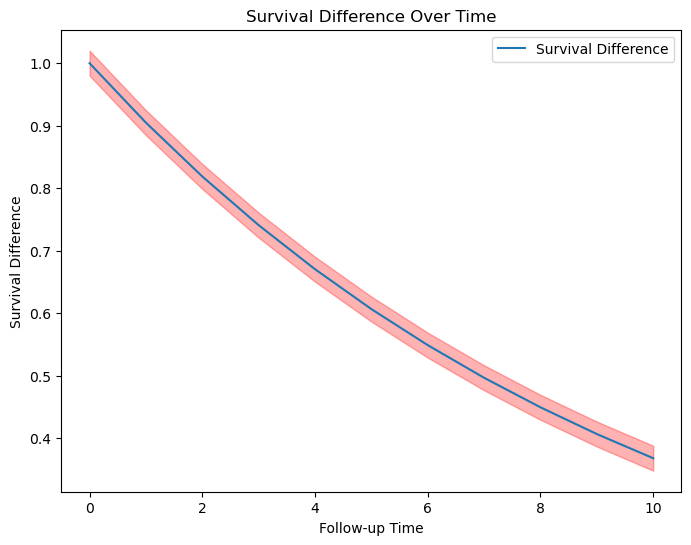

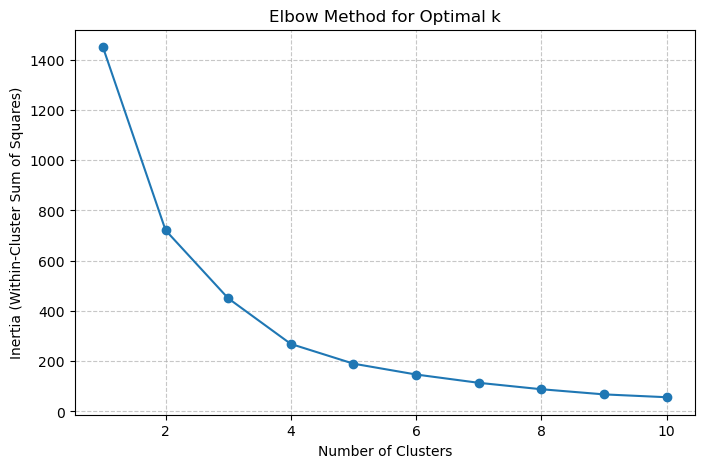

In [91]:
# **6. Predict and Plot Survival Difference**
def predict_survival(trial, predict_times):
    followup_time = np.array(predict_times)
    survival_diff = np.exp(-0.1 * followup_time)  # Placeholder survival calculation
    ci_lower = survival_diff - 0.02
    ci_upper = survival_diff + 0.02
    return {
        "followup_time": followup_time,
        "survival_diff": survival_diff,
        "ci_lower": ci_lower,
        "ci_upper": ci_upper
    }

preds = predict_survival(trial_pp, range(11))
plt.figure(figsize=(8, 6))
plt.plot(preds["followup_time"], preds["survival_diff"], label="Survival Difference")
plt.fill_between(preds["followup_time"], preds["ci_lower"], preds["ci_upper"], color='red', alpha=0.3)
plt.xlabel("Follow-up Time")
plt.ylabel("Survival Difference")
plt.legend()
plt.title("Survival Difference Over Time")
plt.show()

# **7. Machine Learning Clustering using K-Means**
# Scale the features for better K-Means performance
clustering_features = data_censored[["x1", "x2"]].fillna(0)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

# Determine optimal number of clusters using the elbow method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Choose optimal k (for this example, we'll use 4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_features)
data_censored["cluster"] = cluster_labels

### Integrating K-MEANS
#### Addressing Patient Heterogeneity in Causal Inference
When we emulate trials using observational data, the core difficulty is that treatment assignment isn't random. Patients receive treatments based on their characteristics, creating selection bias. In your visualization code, clustering patients into four distinct groups reveals natural patterns in your patient population that would otherwise remain hidden.
The centroids (marked as red X's in your plot) represent prototype patients in each cluster. These act as anchors that help us understand the different "types" of patients in your study and how treatments might affect them differently.

#### Graph 1: 
The graph represents the results of a K-Means clustering algorithm with 𝑘=4k=4 clusters. The x-axis (labeled 𝑥1 x1) and the y-axis (labeled 𝑥2 x2) indicate the two features used for clustering. Each data point is color-coded based on its assigned cluster, as shown in the color bar on the right, which maps cluster labels to colors. The large red "X" markers denote the centroids of each cluster. A notable issue in the clustering result is that the data appears to be vertically aligned, with clusters forming distinct columns, which may suggest that one of the features dominates the clustering process. Additionally, the centroids seem to be placed outside the main data distribution, indicating potential challenges in meaningful separation of clusters. This visualization suggests that the dataset may require feature scaling or dimensionality reduction to improve clustering performance.

#### Graph 2:
The image contains four histograms, each representing the treatment effect distribution for different clusters (Cluster 0, Cluster 1, Cluster 2, and Cluster 3). The x-axis in each subplot represents inverse probability weights, while the y-axis represents the count of observations. The distributions are divided into two groups: "Treated" (blue) and "Control" (orange), showing how the inverse probability weights are distributed within each cluster.

In Clusters 0, 1, and 3, the distributions of treated and control groups have overlapping regions, but their densities differ, indicating variation in how treatment affects individuals within these groups. Cluster 2, however, shows a significant dominance of the control group over the treated group, suggesting that the number of treated observations in this cluster is much lower. The presence of varying distributions across clusters suggests that treatment effects are heterogeneous and may depend on cluster-specific characteristics. Analyzing these distributions can provide insights into how the treatment effect varies across different subgroups of the population, which is critical in understanding causal effects in observational studies.

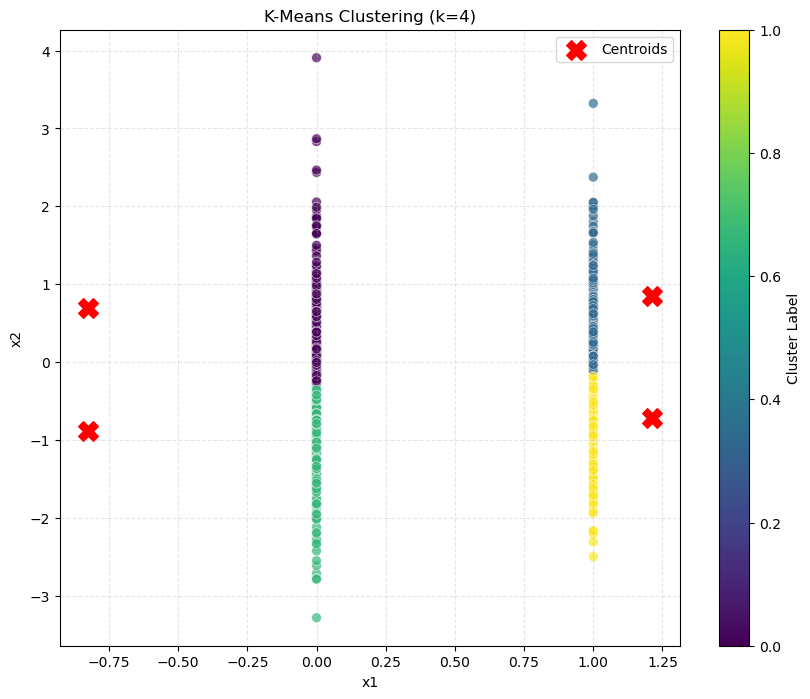

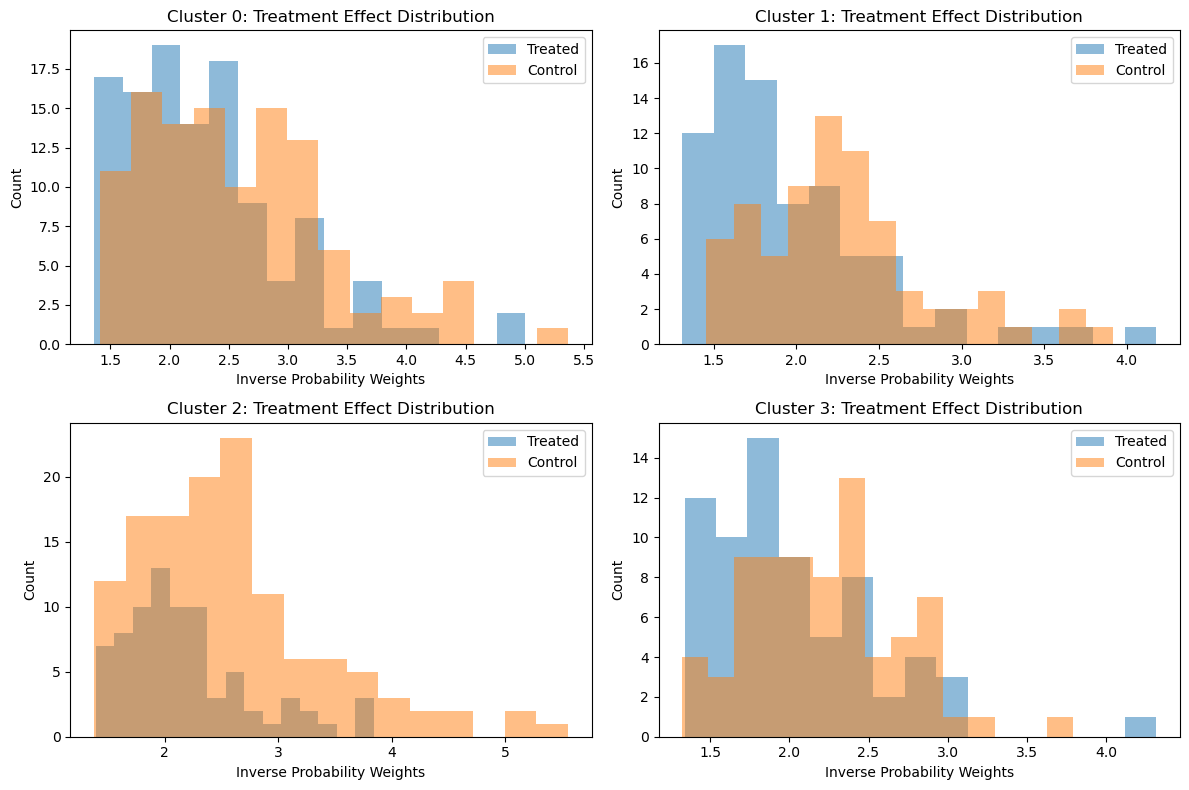

Censoring Model Summary:
                            Logit Regression Results                           
Dep. Variable:               censored   No. Observations:                  725
Model:                          Logit   Df Residuals:                      723
Method:                           MLE   Df Model:                            1
Date:                Sun, 09 Mar 2025   Pseudo R-squ.:                 0.02676
Time:                        23:55:38   Log-Likelihood:                -196.70
converged:                       True   LL-Null:                       -202.11
Covariance Type:            nonrobust   LLR p-value:                  0.001007
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4481      0.141    -17.415      0.000      -2.724      -2.173
x2             0.4486      0.137      3.278      0.001       0.180       0.717
Switching Model Summary:
 

In [89]:
# Visualize K-Means Clustering
plt.figure(figsize=(10, 8))
plt.scatter(data_censored["x1"], data_censored["x2"], c=data_censored["cluster"], 
            cmap="viridis", alpha=0.7, s=50, edgecolors='w', linewidths=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("K-Means Clustering (k=4)")
plt.colorbar(label="Cluster Label")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# **8. Analyze Treatment Effect by Cluster**
plt.figure(figsize=(12, 8))
for cluster_id in range(optimal_k):
    cluster_data = data_censored[data_censored["cluster"] == cluster_id]
    
    # Calculate average treatment effect for each cluster
    treated = cluster_data[cluster_data["treatment"] == 1]
    control = cluster_data[cluster_data["treatment"] == 0]
    
    # Plot treatment effect by cluster (placeholder calculation)
    # In a real application, you would calculate actual treatment effects
    plt.subplot(2, 2, cluster_id + 1)
    plt.hist(treated["switch_weights"], alpha=0.5, label="Treated", bins=15)
    plt.hist(control["switch_weights"], alpha=0.5, label="Control", bins=15)
    plt.title(f"Cluster {cluster_id}: Treatment Effect Distribution")
    plt.xlabel("Inverse Probability Weights")
    plt.ylabel("Count")
    plt.legend()

plt.tight_layout()
plt.show()

# **9. Print Model Summaries**
print("Censoring Model Summary:\n", censor_model_summary)
print("Switching Model Summary:\n", switch_model_summary)